In [7]:
#Nivel de obesidad por género (cantidad hombres y cantidad mujeres)
import pandas as pd

df = pd.read_csv('Obesity.csv')

registro_general = df.loc[(df['Gender'].isin(['Male', 'Female'])) & (df['NObeyesdad'].notnull())]

conteo_obesidad_genero = registro_general.groupby(['NObeyesdad', 'Gender']).size().unstack(fill_value=0)

conteo_obesidad_genero.columns = ['Número de Mujeres', 'Número de Hombres']

print("Nivel de Obesidad por Género:")
print(conteo_obesidad_genero)


Nivel de Obesidad por Género:
                     Número de Mujeres  Número de Hombres
NObeyesdad                                               
Insufficient_Weight                173                 99
Normal_Weight                      141                146
Obesity_Type_I                     156                195
Obesity_Type_II                      2                295
Obesity_Type_III                   323                  1
Overweight_Level_I                 145                145
Overweight_Level_II                103                187


In [8]:
#Promedio del peso por nivel de obesidad y género
import pandas as pd
df = pd.read_csv('Obesity.csv')

registro_general = df.loc[(df['Gender'].isin(['Male', 'Female'])) & (df['NObeyesdad'].notnull())]

promedio_peso_obesidad_genero = registro_general.groupby(['NObeyesdad', 'Gender'])['Weight'].mean().unstack(fill_value=0)

promedio_peso_obesidad_genero = promedio_peso_obesidad_genero.round(2)

promedio_peso_obesidad_genero.columns = ['Promedio de Peso Mujeres', 'Promedio de Peso Hombres']

print("Promedio del Peso por Nivel de Obesidad y Género:")
print(promedio_peso_obesidad_genero)



Promedio del Peso por Nivel de Obesidad y Género:
                     Promedio de Peso Mujeres  Promedio de Peso Hombres
NObeyesdad                                                             
Insufficient_Weight                     46.69                     55.53
Normal_Weight                           56.42                     67.70
Obesity_Type_I                          82.29                    101.33
Obesity_Type_II                         96.75                    115.43
Obesity_Type_III                       120.78                    173.00
Overweight_Level_I                      69.58                     78.95
Overweight_Level_II                     74.54                     86.24


In [10]:
#Promedio de edad por nivel de obesidad y género
import pandas as pd

df = pd.read_csv('Obesity.csv')

registro_general=df.loc[(df['Gender'].isin(['Male','Female']))
                                      & (df['NObeyesdad'].notnull())
                                      & (df['Age'].notnull())]

promedio_edad_obesidad_genero=registro_general.groupby(['NObeyesdad', 'Gender'])['Age'].mean().unstack(fill_value=0)

promedio_edad_obesidad_genero.columns = ['Promedio de Edad Mujeres',
                                         'Promedio de Edad Hombres']

print("Promedio de Edad por Nivel de Obesidad y Género:")
print(promedio_edad_obesidad_genero)


Promedio de Edad por Nivel de Obesidad y Género:
                     Promedio de Edad Mujeres  Promedio de Edad Hombres
NObeyesdad                                                             
Insufficient_Weight                 20.507997                 18.516738
Normal_Weight                       22.028369                 21.458904
Obesity_Type_I                      27.894942                 24.276940
Obesity_Type_II                     24.500000                 28.259099
Obesity_Type_III                    23.512568                 18.000000
Overweight_Level_I                  24.578058                 22.257289
Overweight_Level_II                 27.389479                 26.780793


In [11]:
#Porcentaje de los niveles de obesidad según registros con historial familiar de obesidad a nivel general
import pandas as pd

df = pd.read_csv('Obesity.csv')

historial_familiar= df[df['family_history_with_overweight'] == 'yes']

total_historial_familiar = len(historial_familiar)

porcentaje_obesidad= (historial_familiar['NObeyesdad'].value_counts() / total_historial_familiar) * 100

porcentaje_obesidad_df= porcentaje_obesidad.reset_index()

porcentaje_obesidad_df.columns = ['Nivel de Obesidad', 'Porcentaje']

print("Porcentaje de Niveles de Obesidad con Historial Familiar de Obesidad:")

print(porcentaje_obesidad_df)


Porcentaje de Niveles de Obesidad con Historial Familiar de Obesidad:
     Nivel de Obesidad  Porcentaje
0       Obesity_Type_I   19.930475
1     Obesity_Type_III   18.771727
2      Obesity_Type_II   17.149479
3  Overweight_Level_II   15.758980
4   Overweight_Level_I   12.108922
5        Normal_Weight    8.980301
6  Insufficient_Weight    7.300116


In [13]:
#Porcentaje de los niveles de obesidad según registros sin historial familiar de obesidad
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv('Obesity.csv')
data = pd.DataFrame(df)

dataFiltered = data.loc[data['family_history_with_overweight'] == 'no']

conteo = dataFiltered['NObeyesdad'].value_counts()

porcentaje_obesidad = conteo / len(dataFiltered) * 100

print(porcentaje_obesidad)



NObeyesdad
Insufficient_Weight    37.922078
Normal_Weight          34.285714
Overweight_Level_I     21.038961
Overweight_Level_II     4.675325
Obesity_Type_I          1.818182
Obesity_Type_II         0.259740
Name: count, dtype: float64


In [14]:
# 5 personas con mayor nivel de obesidad en base al peso
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv('Obesity.csv')

data = pd.DataFrame(df)

dataFiltered = data[['Gender','NObeyesdad', 'Weight']]

dataFiltered = dataFiltered.sort_values('Weight', ascending=False)

print(dataFiltered.head(5))

      Gender        NObeyesdad      Weight
344     Male  Obesity_Type_III  173.000000
502   Female  Obesity_Type_III  165.057269
1898  Female  Obesity_Type_III  160.935351
1910  Female  Obesity_Type_III  160.639405
1838  Female  Obesity_Type_III  155.872093


In [15]:
#Niveles de consumo de agua según nivel de obesidad
import pandas as pd
df = pd.read_csv('Obesity.csv')

obesity_levels = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'],
                                   categories=obesity_levels,
                                   ordered=True)

promedio_consumo_agua = df.groupby(['NObeyesdad'])['CH2O'].mean()

print("Promedio de consumo de agua por nivel de obesidad:")
print(promedio_consumo_agua)



Promedio de consumo de agua por nivel de obesidad:
NObeyesdad
Insufficient_Weight    1.871281
Normal_Weight          1.850174
Overweight_Level_I     2.058725
Overweight_Level_II    2.025133
Obesity_Type_I         2.112218
Obesity_Type_II        1.877658
Obesity_Type_III       2.208493
Name: CH2O, dtype: float64


In [17]:
#Tipos de transporte público tomados por las personas según niveles de obesidad
import pandas as pd
df = pd.read_csv('Obesity.csv')
obesity_levels = [
     'Insufficient_Weight',
     'Normal_Weight',
     'Overweight_Level_I',
     'Overweight_Level_II',
     'Obesity_Type_I',
     'Obesity_Type_II',
     'Obesity_Type_III'
]
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'],
                                   categories=obesity_levels,
                                   ordered=True)
registro_general = df.loc[(df['MTRANS'].isin(['Automobile',
                                             'Motorbike',
                                             'Bike',
                                             'Public_Transportation',
                                             'Walking']))]

conteo_obesidad = registro_general.groupby(['NObeyesdad', 'MTRANS']).size().unstack(fill_value=0)

print(conteo_obesidad)

MTRANS               Automobile  Bike  Motorbike  Public_Transportation  \
NObeyesdad                                                                
Insufficient_Weight          46     0          0                    220   
Normal_Weight                45     4          6                    200   
Overweight_Level_I           66     2          1                    212   
Overweight_Level_II          94     0          1                    189   
Obesity_Type_I              110     0          3                    236   
Obesity_Type_II              95     1          0                    200   
Obesity_Type_III              1     0          0                    323   

MTRANS               Walking  
NObeyesdad                    
Insufficient_Weight        6  
Normal_Weight             32  
Overweight_Level_I         9  
Overweight_Level_II        6  
Obesity_Type_I             2  
Obesity_Type_II            1  
Obesity_Type_III           0  


In [18]:
#Cantidad de ejercicio de las personas según nivel de obesidad
import pandas as pd
df = pd.read_csv('Obesity.csv')

obesity_levels = [
     'Insufficient_Weight',
     'Normal_Weight',
     'Overweight_Level_I',
     'Overweight_Level_II',
     'Obesity_Type_I',
     'Obesity_Type_II',
     'Obesity_Type_III'
]

df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'],
                                   categories=obesity_levels,
                                   ordered=True)

promedio_consumo_agua = df.groupby(['NObeyesdad'])['FAF'].mean()

print("Promedio de cantidad de ejercicio por nivel de obesidad:")

print(promedio_consumo_agua)



Promedio de cantidad de ejercicio por nivel de obesidad:
NObeyesdad
Insufficient_Weight    1.250131
Normal_Weight          1.247387
Overweight_Level_I     1.056796
Overweight_Level_II    0.958072
Obesity_Type_I         0.986748
Obesity_Type_II        0.971857
Obesity_Type_III       0.664817
Name: FAF, dtype: float64


# Gráficos

<ipython-input-19-343d14f7e9d2>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = tabla_ordenada, x='NObeyesdad', y='Age', ci=None)


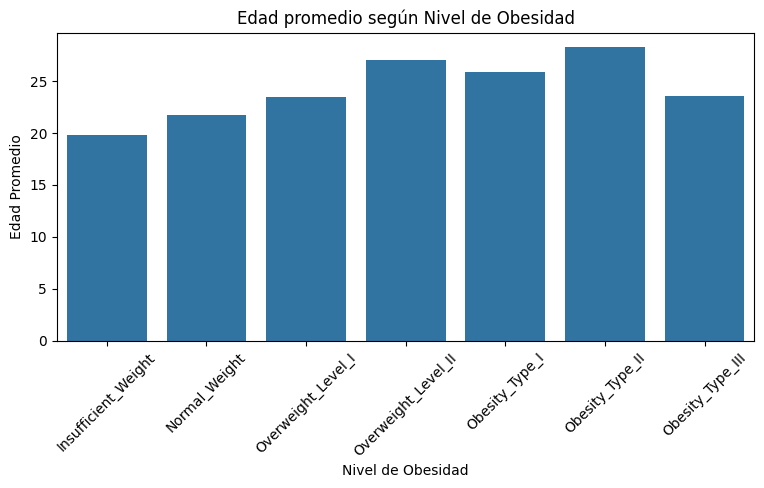

In [19]:
#Gráfico de barras de edad promedio según nivel de obesidad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Obesity.csv')

obesity_levels = [
     'Insufficient_Weight',
     'Normal_Weight',
     'Overweight_Level_I',
     'Overweight_Level_II',
     'Obesity_Type_I',
     'Obesity_Type_II',
     'Obesity_Type_III'
]

df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'],
                                   categories=obesity_levels,
                                   ordered=True)

tabla_ordenada = df.groupby(['NObeyesdad'])['Age'].mean().reset_index()

plt.figure(figsize=(9, 4))

sns.barplot(data = tabla_ordenada, x='NObeyesdad', y='Age', ci=None)

plt.title('Edad promedio según Nivel de Obesidad')

plt.xlabel('Nivel de Obesidad')

plt.ylabel('Edad Promedio')

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()


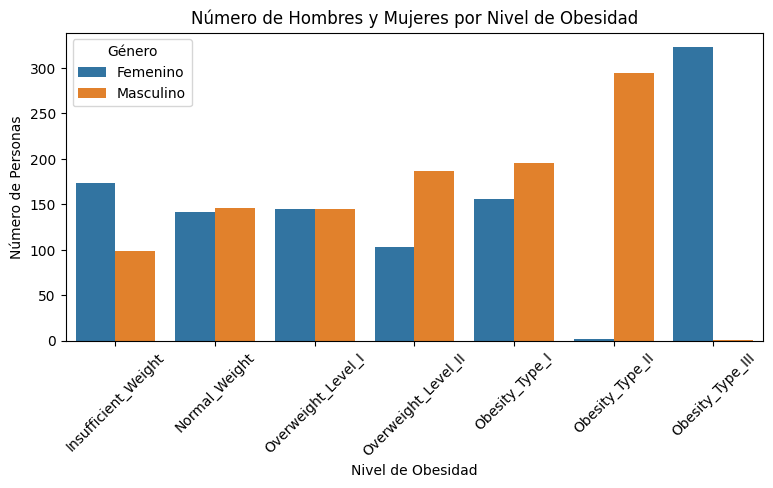

In [20]:
#Gráfico de barras Número de Hombres y mujeres por nivel de obesidad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Obesity.csv')

registro_general = df.loc[(df['Gender'].isin(['Male', 'Female'])) & (df['NObeyesdad'].notnull())]

obesity_levels = [
     'Insufficient_Weight',
     'Normal_Weight',
     'Overweight_Level_I',
     'Overweight_Level_II',
     'Obesity_Type_I',
     'Obesity_Type_II',
     'Obesity_Type_III'
]

registro_general['NObeyesdad'] = pd.Categorical(df['NObeyesdad'],
                                   categories=obesity_levels,
                                   ordered=True)

plt.figure(figsize=(9, 4))

sns.countplot(data=registro_general, x='NObeyesdad', hue='Gender')

plt.title('Número de Hombres y Mujeres por Nivel de Obesidad')

plt.xlabel('Nivel de Obesidad')

plt.ylabel('Número de Personas')

plt.xticks(rotation=45)

plt.legend(['Femenino', 'Masculino'],title='Género')

plt.show()


NObeyesdad
Obesidad Tipo I       351
Obesidad Tipo III     324
Obesidad Tipo II      297
Sobrepeso Nivel I     290
Sobrepeso Nivel II    290
Peso Normal           287
Peso Insuficiente     272
Name: count, dtype: int64


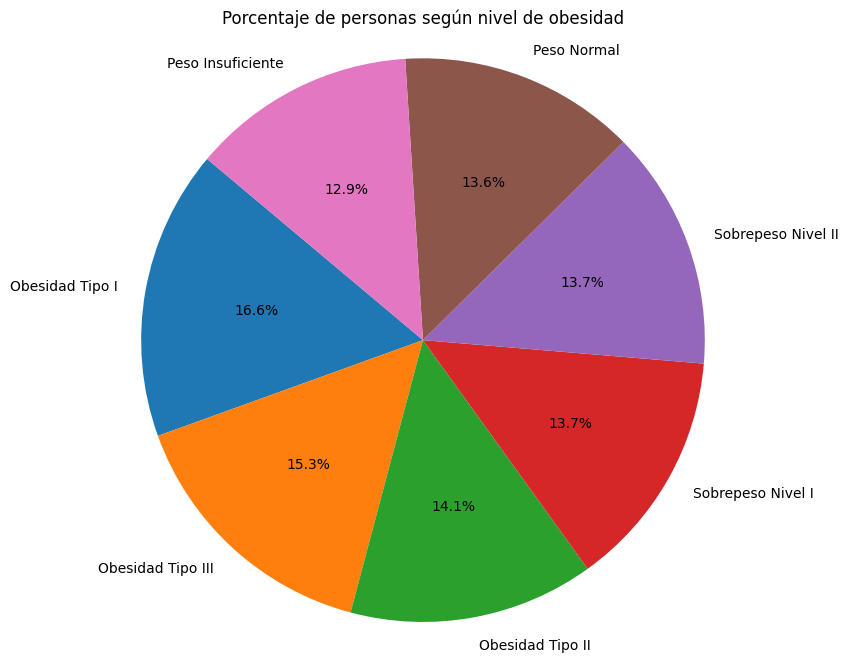

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('Obesity.csv')

# Renombrar las etiquetas de los niveles de obesidad
df['NObeyesdad'] = df['NObeyesdad'].replace({
    'Obesity_Type_I': 'Obesidad Tipo I',
    'Obesity_Type_III': 'Obesidad Tipo III',
    'Obesity_Type_II': 'Obesidad Tipo II',
    'Overweight_Level_II': 'Sobrepeso Nivel II',
    'Overweight_Level_I': 'Sobrepeso Nivel I',
    'Normal_Weight': 'Peso Normal',
    'Insufficient_Weight': 'Peso Insuficiente'
})

# Contar el número de personas en cada nivel de obesidad
cant_obesidad = df['NObeyesdad'].value_counts()

print(cant_obesidad)
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
plt.pie(cant_obesidad, labels=cant_obesidad.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('tab10', len(cant_obesidad)))

plt.title('Porcentaje de personas según nivel de obesidad')
plt.axis('equal')

# Mostrar el gráfico
plt.show()